In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
fitbit_df = pd.read_csv("/content/drive/MyDrive/dailyActivity_merged.csv")
fitbit_df.head()

,Id,ActivityDate,TotalSteps,TotalDistance,TrackerDistance,LoggedActivitiesDistance,VeryActiveDistance,ModeratelyActiveDistance,LightActiveDistance,SedentaryActiveDistance,VeryActiveMinutes,FairlyActiveMinutes,LightlyActiveMinutes,SedentaryMinutes,Calories
0,1503960366,4/12/2016,13162,8.50,8.50,0.0,1.88,0.55,6.06,0.0,25,13,328,728,1985
1,1503960366,4/13/2016,10735,6.97,6.97,0.0,1.57,0.69,4.71,0.0,21,19,217,776,1797
2,1503960366,4/14/2016,10460,6.74,6.74,0.0,2.44,0.40,3.91,0.0,30,11,181,1218,1776
3,1503960366,4/15/2016,9762,6.28,6.28,0.0,2.14,1.26,2.83,0.0,29,34,209,726,1745
4,1503960366,4/16/2016,12669,8.16,8.16,0.0,2.71,0.41,5.04,0.0,36,10,221,773,1863


In [ ]:
fitbit_df.shape

(940, 15)

In [ ]:
enviornment_df = pd.read_csv("/content/drive/MyDrive/Weather-India-12;04;24-12;05;24.csv")
enviornment_df.head()

,date,tavg,tmin,tmax,prcp,snow,wdir,wspd,wpgt,pres,tsun
0,2024-04-12,29.6,22.0,38.8,0.0,NaN,68,2.2,NaN,1009.0,NaN
1,2024-04-13,28.9,23.9,39.0,0.0,NaN,134,6.3,NaN,1008.3,NaN
2,2024-04-14,26.7,23.0,32.5,0.0,NaN,352,4.9,NaN,1010.5,NaN
3,2024-04-15,28.4,21.6,33.8,0.0,NaN,329,3.5,NaN,1010.3,NaN
4,2024-04-16,28.6,23.9,33.6,0.0,NaN,287,11.3,NaN,1009.2,NaN


In [ ]:
enviornment_df.shape

(31, 11)

BASIC PREPROCESSING STEPS

In [ ]:
print("Fitbit Missing Values:")
print(fitbit_df.isnull().sum())

Fitbit Missing Values:
Id                          0
ActivityDate                0
TotalSteps                  0
TotalDistance               0
TrackerDistance             0
LoggedActivitiesDistance    0
VeryActiveDistance          0
ModeratelyActiveDistance    0
LightActiveDistance         0
SedentaryActiveDistance     0
VeryActiveMinutes           0
FairlyActiveMinutes         0
LightlyActiveMinutes        0
SedentaryMinutes            0
Calories                    0
dtype: int64


In [ ]:
print("\nEnvironmental Missing Values:")
print(enviornment_df.isnull().sum())


Environmental Missing Values:
date     0
tavg     0
tmin     0
tmax     0
prcp     0
snow    31
wdir     0
wspd     0
wpgt    31
pres     0
tsun    31
dtype: int64


In [ ]:
# Drop columns with any null values in the environmental dataset
enviornment_df = enviornment_df.dropna(axis=1)

# Verify the remaining columns
print("Remaining columns in environmental dataset:\n", enviornment_df.columns)

Remaining columns in environmental dataset:
 Index(['date', 'tavg', 'tmin', 'tmax', 'prcp', 'wdir', 'wspd', 'pres'], dtype='object')


In [ ]:
# Assuming 'ActivityDate' is in a format like 'YYYY-MM-DD'
fitbit_df['ActivityDate'] = pd.to_datetime(fitbit_df['ActivityDate'])  # Convert to datetime
fitbit_df['ActivityDate'] = fitbit_df['ActivityDate'].apply(lambda x: x.replace(year=2024))

In [ ]:
fitbit_df.head()

,Id,ActivityDate,TotalSteps,TotalDistance,TrackerDistance,LoggedActivitiesDistance,VeryActiveDistance,ModeratelyActiveDistance,LightActiveDistance,SedentaryActiveDistance,VeryActiveMinutes,FairlyActiveMinutes,LightlyActiveMinutes,SedentaryMinutes,Calories
0,1503960366,2024-04-12,13162,8.50,8.50,0.0,1.88,0.55,6.06,0.0,25,13,328,728,1985
1,1503960366,2024-04-13,10735,6.97,6.97,0.0,1.57,0.69,4.71,0.0,21,19,217,776,1797
2,1503960366,2024-04-14,10460,6.74,6.74,0.0,2.44,0.40,3.91,0.0,30,11,181,1218,1776
3,1503960366,2024-04-15,9762,6.28,6.28,0.0,2.14,1.26,2.83,0.0,29,34,209,726,1745
4,1503960366,2024-04-16,12669,8.16,8.16,0.0,2.71,0.41,5.04,0.0,36,10,221,773,1863


In [ ]:
# Total number of unique IDs in the Fitbit dataset
unique_ids = fitbit_df['Id'].nunique()
print("Total number of unique IDs:", unique_ids)

# Number of entries (days) for each unique ID
entries_per_id = fitbit_df['Id'].value_counts()
print("\nNumber of entries (days) for each ID:\n", entries_per_id)

Total number of unique IDs: 33

Number of entries (days) for each ID:
 Id
1503960366    31
4319703577    31
8583815059    31
8378563200    31
8053475328    31
7086361926    31
6962181067    31
5553957443    31
4702921684    31
4558609924    31
1624580081    31
4388161847    31
4445114986    31
8877689391    31
1927972279    31
2873212765    31
2320127002    31
4020332650    31
2026352035    31
1844505072    31
2022484408    31
3977333714    30
1644430081    30
5577150313    30
8792009665    29
6290855005    29
6117666160    28
6775888955    26
7007744171    26
3372868164    20
8253242879    19
2347167796    18
4057192912     4
Name: count, dtype: int64


In [ ]:
# Count the number of entries for each ID
entries_per_id = fitbit_df['Id'].value_counts()

# Filter out IDs that have less than 31 entries
ids_to_keep = entries_per_id[entries_per_id >= 31].index

# Keep only the rows where the 'Id' is in the list of IDs with 31 or more entries
filtered_fitbit_df = fitbit_df[fitbit_df['Id'].isin(ids_to_keep)]

# Verify the number of entries per ID after filtering
print("\nNumber of entries per ID after filtering:\n", filtered_fitbit_df['Id'].value_counts())



Number of entries per ID after filtering:
 Id
1503960366    31
4445114986    31
8583815059    31
8378563200    31
8053475328    31
7086361926    31
6962181067    31
5553957443    31
4702921684    31
4558609924    31
4388161847    31
1624580081    31
4319703577    31
4020332650    31
2873212765    31
2320127002    31
2026352035    31
2022484408    31
1927972279    31
1844505072    31
8877689391    31
Name: count, dtype: int64


In [ ]:
filtered_fitbit_df.shape

(651, 15)

MERGE BOTH THE DATASET

In [ ]:
# Convert 'ActivityDate' in filtered_fitbit_df to datetime if it's not already
filtered_fitbit_df['ActivityDate'] = pd.to_datetime(filtered_fitbit_df['ActivityDate'])

# Convert 'date' in enviornment_df to datetime
enviornment_df['date'] = pd.to_datetime(enviornment_df['date'])

# Now perform the merge
merged_df = pd.merge(filtered_fitbit_df, enviornment_df, left_on='ActivityDate', right_on='date', how='inner')

# Verify the result
print(merged_df.head())


           Id ActivityDate  TotalSteps  TotalDistance  TrackerDistance  \
0  1503960366   2024-04-12       13162           8.50             8.50   
1  1503960366   2024-04-13       10735           6.97             6.97   
2  1503960366   2024-04-14       10460           6.74             6.74   
3  1503960366   2024-04-15        9762           6.28             6.28   
4  1503960366   2024-04-16       12669           8.16             8.16   

   LoggedActivitiesDistance  VeryActiveDistance  ModeratelyActiveDistance  \
0                       0.0                1.88                      0.55   
1                       0.0                1.57                      0.69   
2                       0.0                2.44                      0.40   
3                       0.0                2.14                      1.26   
4                       0.0                2.71                      0.41   

   LightActiveDistance  SedentaryActiveDistance  ...  SedentaryMinutes  \
0                 

<ipython-input-14-3923a79e4858>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_fitbit_df['ActivityDate'] = pd.to_datetime(filtered_fitbit_df['ActivityDate'])


In [ ]:
merged_df.shape

(651, 23)

In [ ]:
# Check basic info about the data (e.g., number of non-null entries, data types)
print(merged_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 651 entries, 0 to 650
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   Id                        651 non-null    int64         
 1   ActivityDate              651 non-null    datetime64[ns]
 2   TotalSteps                651 non-null    int64         
 3   TotalDistance             651 non-null    float64       
 4   TrackerDistance           651 non-null    float64       
 5   LoggedActivitiesDistance  651 non-null    float64       
 6   VeryActiveDistance        651 non-null    float64       
 7   ModeratelyActiveDistance  651 non-null    float64       
 8   LightActiveDistance       651 non-null    float64       
 9   SedentaryActiveDistance   651 non-null    float64       
 10  VeryActiveMinutes         651 non-null    int64         
 11  FairlyActiveMinutes       651 non-null    int64         
 12  LightlyActiveMinutes  

In [ ]:
# Get basic statistics about numerical columns
print(merged_df.describe())

                 Id         ActivityDate    TotalSteps  TotalDistance  \
count  6.510000e+02                  651    651.000000     651.000000   
mean   4.574956e+09  2024-04-27 00:00:00   7927.116743       5.710353   
min    1.503960e+09  2024-04-12 00:00:00      0.000000       0.000000   
25%    2.026352e+09  2024-04-19 00:00:00   3930.000000       2.670000   
50%    4.388162e+09  2024-04-27 00:00:00   7833.000000       5.350000   
75%    6.962181e+09  2024-05-05 00:00:00  10990.500000       7.865000   
max    8.877689e+09  2024-05-12 00:00:00  36019.000000      28.030001   
std    2.472160e+09                  NaN   5226.177027       4.128303   

       TrackerDistance  LoggedActivitiesDistance  VeryActiveDistance  \
count       651.000000                651.000000          651.000000   
mean          5.707189                  0.068565            1.669432   
min           0.000000                  0.000000            0.000000   
25%           2.670000                  0.000000      

In [ ]:
# Check for missing values
missing_values = merged_df.isnull().sum()
print("Missing Values:\n", missing_values)

Missing Values:
 Id                          0
ActivityDate                0
TotalSteps                  0
TotalDistance               0
TrackerDistance             0
LoggedActivitiesDistance    0
VeryActiveDistance          0
ModeratelyActiveDistance    0
LightActiveDistance         0
SedentaryActiveDistance     0
VeryActiveMinutes           0
FairlyActiveMinutes         0
LightlyActiveMinutes        0
SedentaryMinutes            0
Calories                    0
date                        0
tavg                        0
tmin                        0
tmax                        0
prcp                        0
wdir                        0
wspd                        0
pres                        0
dtype: int64


In [ ]:
# Check for duplicates
duplicates = merged_df.duplicated().sum()
print(f"Number of duplicate rows: {duplicates}")

# Remove duplicates if needed
merged_df = merged_df.drop_duplicates()

Number of duplicate rows: 0


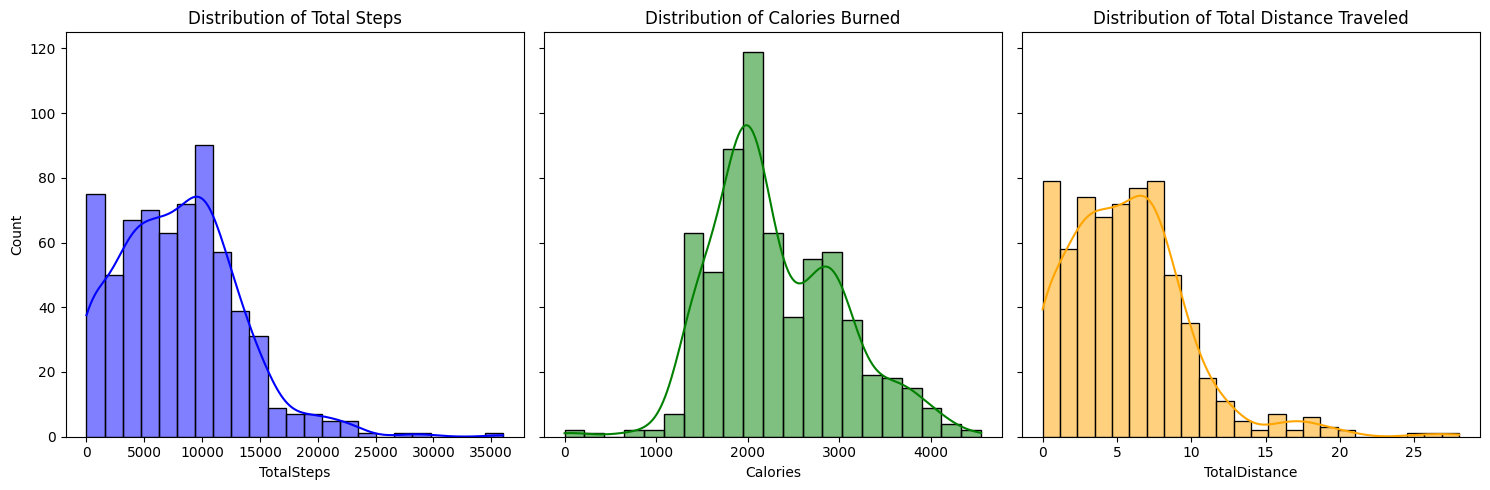

In [ ]:
# Create a figure with three subplots side by side
fig, axes = plt.subplots(1, 3, figsize=(15, 5), sharey=True)

# Histogram for Total Steps
sns.histplot(merged_df['TotalSteps'], kde=True, ax=axes[0], color='blue')
axes[0].set_title('Distribution of Total Steps')

# Histogram for Calories
sns.histplot(merged_df['Calories'], kde=True, ax=axes[1], color='green')
axes[1].set_title('Distribution of Calories Burned')

# Histogram for Total Distance
sns.histplot(merged_df['TotalDistance'], kde=True, ax=axes[2], color='orange')
axes[2].set_title('Distribution of Total Distance Traveled')

# Adjust layout
plt.tight_layout()
plt.show()


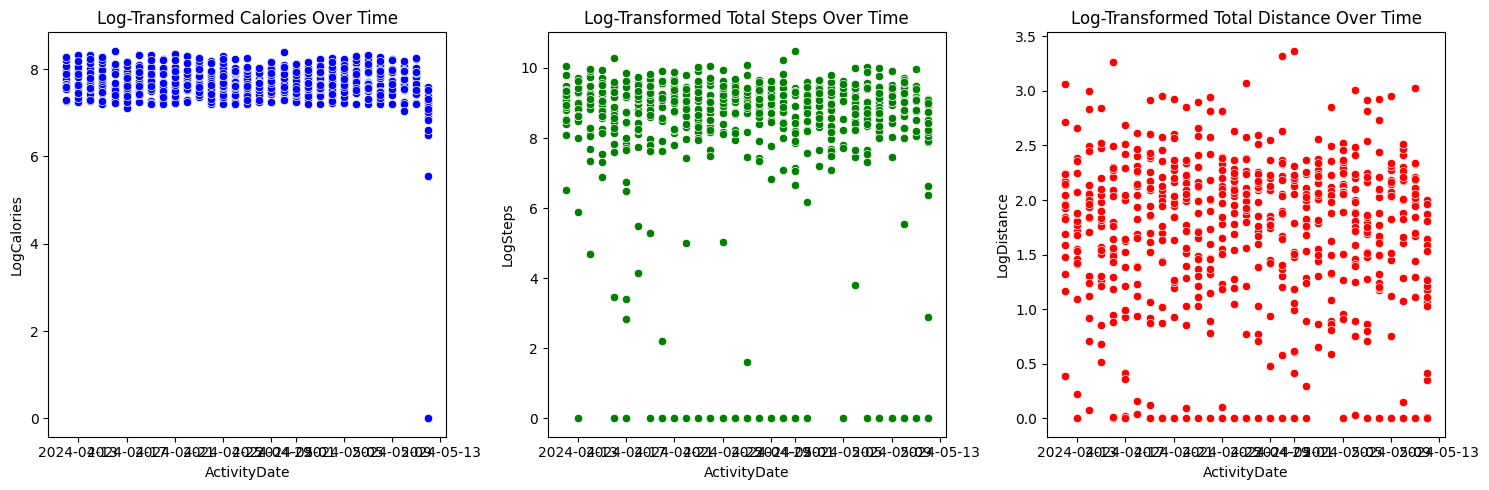

In [ ]:
# Log-transform data to improve scale visibility
merged_df['LogCalories'] = np.log1p(merged_df['Calories'])
merged_df['LogSteps'] = np.log1p(merged_df['TotalSteps'])
merged_df['LogDistance'] = np.log1p(merged_df['TotalDistance'])

# Scatter plots for each metric
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

sns.scatterplot(ax=axes[0], data=merged_df, y='LogCalories', x='ActivityDate', color='blue')
axes[0].set_title('Log-Transformed Calories Over Time')

sns.scatterplot(ax=axes[1], data=merged_df, y='LogSteps', x='ActivityDate', color='green')
axes[1].set_title('Log-Transformed Total Steps Over Time')

sns.scatterplot(ax=axes[2], data=merged_df, y='LogDistance', x='ActivityDate', color='red')
axes[2].set_title('Log-Transformed Total Distance Over Time')

plt.tight_layout()
plt.show()



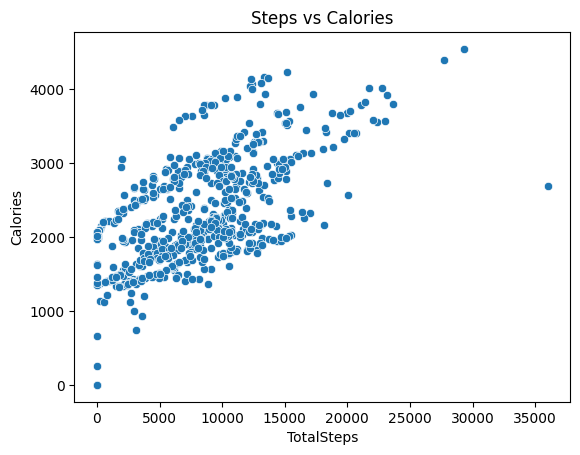

In [ ]:
# Scatter plot between 'TotalSteps' and 'Calories'
sns.scatterplot(x=merged_df['TotalSteps'], y=merged_df['Calories'])
plt.title('Steps vs Calories')
plt.show()

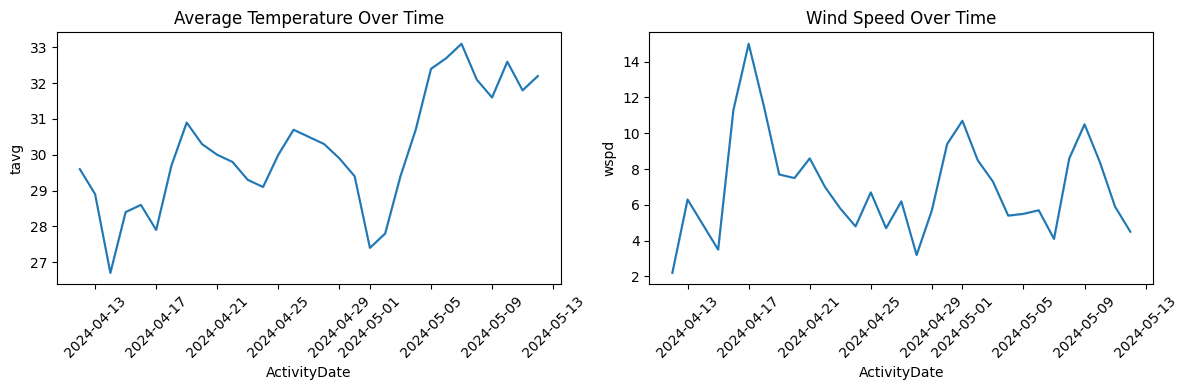

In [ ]:
# Create a figure with two subplots side by side
fig, axes = plt.subplots(1, 2, figsize=(12, 4), sharex=True)

# Plot the average temperature over time
sns.lineplot(ax=axes[0], x=merged_df['ActivityDate'], y=merged_df['tavg'])
axes[0].set_title('Average Temperature Over Time')
axes[0].tick_params(axis='x', rotation=45)

# Plot the wind speed over time
sns.lineplot(ax=axes[1], x=merged_df['ActivityDate'], y=merged_df['wspd'])
axes[1].set_title('Wind Speed Over Time')
axes[1].tick_params(axis='x', rotation=45)

# Adjust layout
plt.tight_layout()
plt.show()



In [ ]:
# Create a new feature for total active minutes (combining various activity minutes)
merged_df['TotalActiveMinutes'] = merged_df['VeryActiveMinutes'] + merged_df['FairlyActiveMinutes'] + merged_df['LightlyActiveMinutes']
print(merged_df[['VeryActiveMinutes', 'FairlyActiveMinutes', 'LightlyActiveMinutes', 'TotalActiveMinutes']].head())

# Create a binary feature for high activity days (e.g., TotalSteps > 10,000 is a high activity day)
merged_df['HighActivityDay'] = merged_df['TotalSteps'].apply(lambda x: 1 if x > 10000 else 0)
print(merged_df[['TotalSteps', 'HighActivityDay']].head())


   VeryActiveMinutes  FairlyActiveMinutes  LightlyActiveMinutes  \
0                 25                   13                   328   
1                 21                   19                   217   
2                 30                   11                   181   
3                 29                   34                   209   
4                 36                   10                   221   

   TotalActiveMinutes  
0                 366  
1                 257  
2                 222  
3                 272  
4                 267  
   TotalSteps  HighActivityDay
0       13162                1
1       10735                1
2       10460                1
3        9762                0
4       12669                1


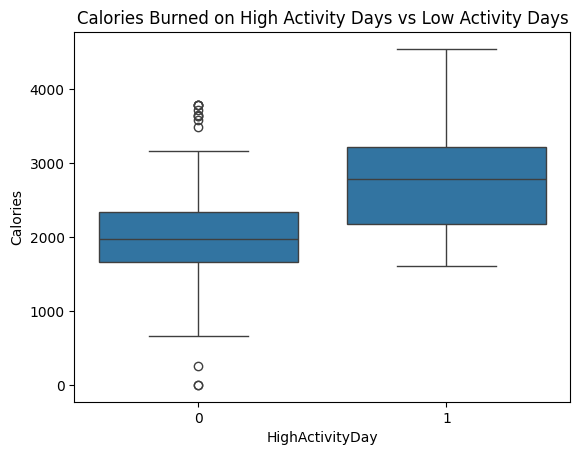

In [ ]:
# Group by 'HighActivityDay' and see the distribution of Calories
sns.boxplot(x='HighActivityDay', y='Calories', data=merged_df)
plt.title('Calories Burned on High Activity Days vs Low Activity Days')
plt.show()

ML MODEL


In [ ]:
# Define weights
w1, w2, w3, w4, w5 = 0.4, 0.2, 0.15, 0.1, 0.15  # Weights for activity components
alpha, beta = 0.7, 0.3  # Weights for activity vs climate stress

# Compute total minutes for activity-based normalization
def calculate_total_minutes(row):
    return row['SedentaryMinutes'] + row['VeryActiveMinutes'] + row['FairlyActiveMinutes'] + row['LightlyActiveMinutes']


In [ ]:
# Activity stress calculation
def calculate_activity_stress(row, max_calories):
    total_minutes = calculate_total_minutes(row)
    if total_minutes == 0:
        return np.nan  # Handle missing data
    sedentary_ratio = row['SedentaryMinutes'] / total_minutes
    very_active_ratio = row['VeryActiveMinutes'] / total_minutes
    fairly_active_ratio = row['FairlyActiveMinutes'] / total_minutes
    lightly_active_ratio = row['LightlyActiveMinutes'] / total_minutes
    calorie_ratio = 1 - row['Calories'] / max_calories

    activity_stress = (w1 * sedentary_ratio -
                       w2 * very_active_ratio -
                       w3 * fairly_active_ratio -
                       w4 * lightly_active_ratio +
                       w5 * calorie_ratio)
    return np.clip(activity_stress, 0, 1)  # Normalize to [0, 1]


In [ ]:
# Climate stress calculation
def calculate_climate_stress(row):
    climate_stress = (abs(row['tavg'] - 22) + row['prcp']) / 10  # Normalize
    return np.clip(climate_stress, 0, 1)  # Normalize to [0, 1]

In [ ]:
# Final stress score calculation
def calculate_stress_score(row, max_calories):
    activity_stress = calculate_activity_stress(row, max_calories)
    climate_stress = calculate_climate_stress(row)
    final_stress = alpha * activity_stress + beta * climate_stress
    return np.clip(final_stress, 0, 1)  # Normalize to [0, 1]


In [ ]:
# Apply calculations to the dataset
max_calories = merged_df['Calories'].max()  # Get the max calories value for normalization
merged_df['TotalMinutes'] = merged_df.apply(calculate_total_minutes, axis=1)
merged_df['ActivityStress'] = merged_df.apply(lambda row: calculate_activity_stress(row, max_calories), axis=1)
merged_df['ClimateStress'] = merged_df.apply(calculate_climate_stress, axis=1)
merged_df['StressScore'] = merged_df.apply(lambda row: calculate_stress_score(row, max_calories), axis=1)



In [ ]:
print(merged_df[['ActivityStress', 'ClimateStress', 'StressScore']])

     ActivityStress  ClimateStress  StressScore
0          0.314362           0.76     0.448053
1          0.363372           0.69     0.461360
2          0.411863           0.47     0.429304
3          0.351553           0.64     0.438087
4          0.356234           0.66     0.447364
..              ...            ...          ...
646        0.362400           1.00     0.553680
647        0.314591           0.96     0.508214
648        0.367097           1.00     0.556968
649        0.308379           0.98     0.509865
650        0.400013           1.00     0.580009

[651 rows x 3 columns]


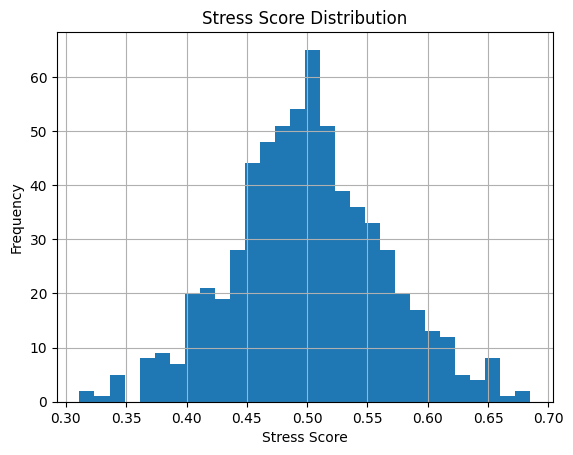

In [ ]:
merged_df['StressScore'].hist(bins=30)
plt.title('Stress Score Distribution')
plt.xlabel('Stress Score')
plt.ylabel('Frequency')
plt.show()


In [ ]:
correlations = merged_df.corr()
print(correlations['StressScore'])

Id                         -0.257915
ActivityDate                0.458833
TotalSteps                 -0.538784
TotalDistance              -0.513734
TrackerDistance            -0.513618
LoggedActivitiesDistance   -0.140445
VeryActiveDistance         -0.276373
ModeratelyActiveDistance   -0.288723
LightActiveDistance        -0.574353
SedentaryActiveDistance    -0.031406
VeryActiveMinutes          -0.341407
FairlyActiveMinutes        -0.305947
LightlyActiveMinutes       -0.538876
SedentaryMinutes            0.476019
Calories                   -0.472174
date                        0.458833
tavg                        0.658434
tmin                        0.457780
tmax                        0.525403
prcp                        0.222817
wdir                       -0.407177
wspd                       -0.124096
pres                       -0.331895
LogCalories                -0.383625
LogSteps                   -0.507727
LogDistance                -0.576259
TotalActiveMinutes         -0.614909
H

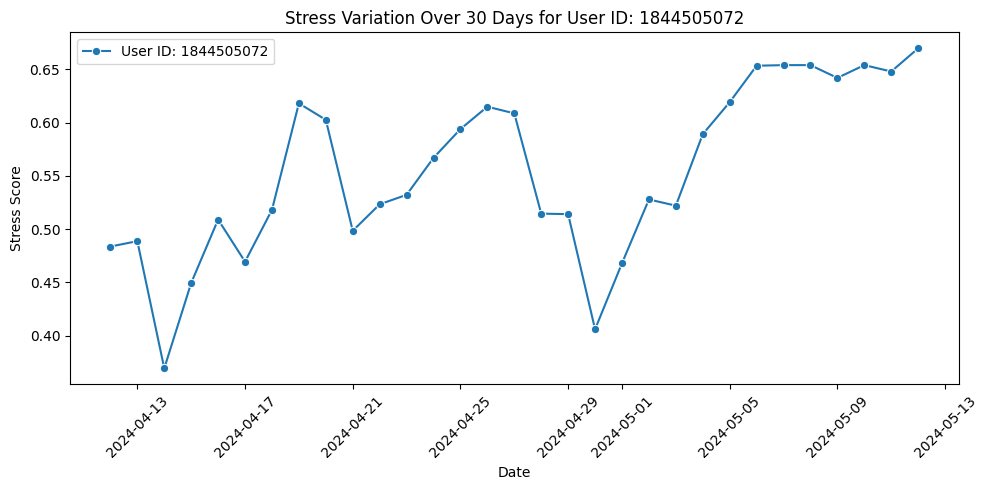

In [ ]:
import random

# Randomly select an ID
random_id = random.choice(merged_df['Id'].unique())

# Filter data for the selected ID
user_data = merged_df[merged_df['Id'] == random_id]

# Ensure the data is sorted by date
user_data = user_data.sort_values(by='ActivityDate')

# Plot the stress score variation over 30 days
plt.figure(figsize=(10, 5))
sns.lineplot(data=user_data, x='ActivityDate', y='StressScore', marker='o', label=f'User ID: {random_id}')
plt.title(f'Stress Variation Over 30 Days for User ID: {random_id}')
plt.xlabel('Date')
plt.ylabel('Stress Score')
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()
plt.show()


LOGICAL Validation

In [ ]:
merged_df['ActivityLevel'] = pd.cut(
    merged_df['VeryActiveMinutes'],
    bins=[0, 10, 30, 60, 120],
    labels=['Low', 'Moderate', 'High', 'Very High']
)
activity_trend = merged_df.groupby('ActivityLevel')['StressScore'].mean()
print(activity_trend)


ActivityLevel
Low          0.490750
Moderate     0.485603
High         0.478574
Very High    0.469388
Name: StressScore, dtype: float64


<ipython-input-36-5d7df9aa712b>:6: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  activity_trend = merged_df.groupby('ActivityLevel')['StressScore'].mean()


Mean Absolute Error (MAE) across folds: 0.0181
Root Mean Squared Error (RMSE) across folds: 0.0239
R-Squared (R²) across folds: 0.8301

Evaluation Metrics on the entire dataset:
Mean Absolute Error (MAE): 0.0169
Root Mean Squared Error (RMSE): 0.0226
R-Squared (R²): 0.8720


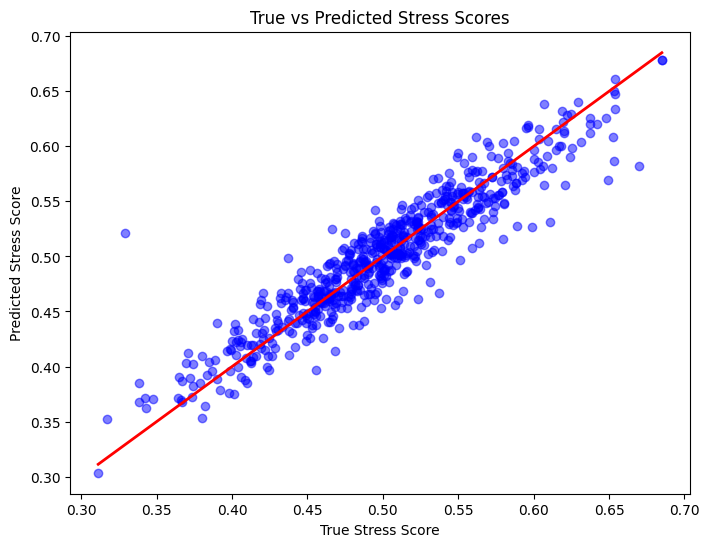

In [ ]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_validate
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import matplotlib.pyplot as plt

# Assuming you have a dataframe 'data' that contains the following columns:
# 'StressScore' (target variable)
# 'SedentaryMinutes', 'VeryActiveMinutes', 'Calories', 'tavg' (features)

# Separate features (X) and target (y)
X = merged_df[['SedentaryMinutes', 'VeryActiveMinutes', 'Calories', 'tavg']]  # Features
y = merged_df['StressScore']  # Target variable (StressScore)

# Define the model
model = LinearRegression()

# Perform cross-validation with multiple metrics (MAE, RMSE, R²)
cv_results = cross_validate(
    model, X, y, cv=10,  # 10-fold cross-validation
    scoring=['neg_mean_absolute_error', 'neg_mean_squared_error', 'r2'],  # Multiple metrics
    return_train_score=False  # We only care about test scores
)

# Display the results for each fold (mean of the metrics)
print(f"Mean Absolute Error (MAE) across folds: {-cv_results['test_neg_mean_absolute_error'].mean():.4f}")
print(f"Root Mean Squared Error (RMSE) across folds: {np.sqrt(-cv_results['test_neg_mean_squared_error'].mean()):.4f}")
print(f"R-Squared (R²) across folds: {cv_results['test_r2'].mean():.4f}")

# Now let's evaluate the model on the entire dataset for additional insights

# Train the model on the full dataset
model.fit(X, y)

# Predict stress scores using the trained model
y_pred = model.predict(X)

# Calculate evaluation metrics for the entire dataset
mae = mean_absolute_error(y, y_pred)  # Mean Absolute Error
rmse = np.sqrt(mean_squared_error(y, y_pred))  # Root Mean Squared Error
r2 = r2_score(y, y_pred)  # R-Squared

# Print out the evaluation metrics for the entire dataset
print(f"\nEvaluation Metrics on the entire dataset:")
print(f"Mean Absolute Error (MAE): {mae:.4f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.4f}")
print(f"R-Squared (R²): {r2:.4f}")

# Visualize the predicted vs actual stress scores to visually assess the model's performance
plt.figure(figsize=(8, 6))
plt.scatter(y, y_pred, color='blue', alpha=0.5)
plt.plot([y.min(), y.max()], [y.min(), y.max()], color='red', linewidth=2)  # Ideal line (y = x)
plt.xlabel('True Stress Score')
plt.ylabel('Predicted Stress Score')
plt.title('True vs Predicted Stress Scores')
plt.show()


In [ ]:
# Step 1: Define your feature set (X) and target variable (y)
X = merged_df[['SedentaryMinutes', 'VeryActiveMinutes', 'Calories', 'tavg']]  # Features (independent variables)
y = merged_df['StressScore']  # Target variable (dependent variable)

# Step 2: Split the dataset into training and testing sets (80% train, 20% test)
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 3: Initialize and train the models
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR

rf_model = RandomForestRegressor(random_state=42)
svr_model = SVR()

# Train models
rf_model.fit(X_train, y_train)
svr_model.fit(X_train, y_train)

# Step 4: Evaluate the models on the test data
rf_pred = rf_model.predict(X_test)
svr_pred = svr_model.predict(X_test)

# Step 5: Evaluate performance using Mean Squared Error (MSE)
from sklearn.metrics import mean_squared_error, r2_score

rf_mse = mean_squared_error(y_test, rf_pred)
svr_mse = mean_squared_error(y_test, svr_pred)

# Step 6: Calculate R-squared (R²) for both models
rf_r2 = r2_score(y_test, rf_pred)
svr_r2 = r2_score(y_test, svr_pred)

# Step 7: Print results
print("Random Forest MSE:", rf_mse)
print("SVR MSE:", svr_mse)

print("Random Forest R²:", rf_r2)
print("SVR R²:", svr_r2)



Random Forest MSE: 0.0002602456344840973
SVR MSE: 0.002089564146955519
Random Forest R²: 0.9400822268073442
SVR R²: 0.5189082388375792


In [ ]:
from sklearn.svm import SVR
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

# Sample data (replace this with your actual dataset)
# Assuming `X` is your features and `y` is the target (StressScore)
X = merged_df[['SedentaryMinutes', 'VeryActiveMinutes', 'Calories', 'tavg']]  # Features (independent variables)
y = merged_df['StressScore']  # Target variable (dependent variable)

# Step 1: Feature Scaling (important for SVR)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Step 2: Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Step 3: Initialize the SVR model with RBF kernel
svr_model = SVR(kernel='rbf')

# Step 4: Hyperparameter tuning using GridSearchCV
param_grid = {
    'C': [1, 10, 100, 1000],  # Regularization parameter
    'epsilon': [0.01, 0.1, 0.2],  # Epsilon parameter for margin of tolerance
    'gamma': ['scale', 'auto', 0.1, 1]  # Gamma parameter for kernel
}

grid_search = GridSearchCV(svr_model, param_grid, cv=5, scoring='neg_mean_squared_error')
grid_search.fit(X_train, y_train)

# Step 5: Print the best parameters from GridSearchCV
print(f"Best parameters found: {grid_search.best_params_}")

# Step 6: Train the model with the best parameters
best_svr_model = grid_search.best_estimator_

# Step 7: Make predictions on the test set
y_pred = best_svr_model.predict(X_test)

# Step 8: Evaluate the model's performance
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"SVR Mean Squared Error (MSE): {mse}")
print(f"SVR R²: {r2}")

Best parameters found: {'C': 1, 'epsilon': 0.01, 'gamma': 0.1}
SVR Mean Squared Error (MSE): 0.000432311144477235
SVR R²: 0.9004666450801608


In [ ]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant

# Add a constant column to the features matrix
X_const = add_constant(X)

# Calculate the VIF for each feature
vif_data = pd.DataFrame()
vif_data["Variable"] = X_const.columns
vif_data["VIF"] = [variance_inflation_factor(X_const.values, i) for i in range(X_const.shape[1])]

print(vif_data)


            Variable         VIF
0              const  393.888066
1   SedentaryMinutes    1.019813
2  VeryActiveMinutes    1.654245
3           Calories    1.661831
4               tavg    1.007733


In [ ]:
import statsmodels.api as sm

X = merged_df[['SedentaryMinutes', 'VeryActiveMinutes', 'Calories', 'tavg']]
X = sm.add_constant(X)
y = merged_df['StressScore']

model = sm.OLS(y, X).fit()
print(model.summary())


                            OLS Regression Results                            
Dep. Variable:            StressScore   R-squared:                       0.872
Model:                            OLS   Adj. R-squared:                  0.871
Method:                 Least Squares   F-statistic:                     1100.
Date:                Wed, 27 Nov 2024   Prob (F-statistic):          1.15e-286
Time:                        20:31:42   Log-Likelihood:                 1542.5
No. Observations:                 651   AIC:                            -3075.
Df Residuals:                     646   BIC:                            -3053.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                -0.3339      0.01

In [ ]:
# Feature engineering: Combination-based parameters
merged_df['stress_temp_ratio'] = merged_df['StressScore'] / (merged_df['temperature'] + 1)
merged_df['sedentary_to_active_ratio'] = merged_df['sedentary_minutes'] / (merged_df['active_minutes'] + 1)
merged_df['calories_per_step'] = merged_df['calories'] / (merged_df['steps'] + 1)

# Select features for modeling
features = merged_df[['stress_score', 'temperature', 'sedentary_to_active_ratio', 'stress_temp_ratio', 'calories_per_step']]

# Normalize features
scaler = MinMaxScaler()
features_normalized = scaler.fit_transform(features)

# k-Nearest Neighbors model
model = NearestNeighbors(n_neighbors=5, metric='euclidean')
model.fit(features_normalized)

# Input example: User's current parameters
user_input = [[0.8, 30, 2.5, 0.025, 0.003]]  # Example: stress_score, temp, sedentary/active ratio, stress/temp ratio, calories/step
user_input_normalized = scaler.transform(user_input)

# Find similar profiles
distances, indices = model.kneighbors(user_input_normalized)

# Recommended profiles
recommended_profiles = merged_df.iloc[indices[0]]
print("Recommended Profiles:\n", recommended_profiles)

# Generate personalized recommendations based on combinations
def generate_recommendation(row):
    recommendations = []
    # Stress and temperature
    if row['stress_score'] > 0.7 and row['temperature'] > 35:
        recommendations.append("Reduce stress-inducing activities and stay in a cool environment.")
    # Sedentary minutes and active minutes
    if row['sedentary_to_active_ratio'] > 3:
        recommendations.append("Increase active minutes with light exercises.")
    # Calories burned per step
    if row['calories_per_step'] < 0.005:
        recommendations.append("Consider increasing workout intensity to burn more calories.")
    return recommendations

# Apply recommendations
recommended_profiles['recommendations'] = recommended_profiles.apply(generate_recommendation, axis=1)

# Display recommendations
print(recommended_profiles[['date', 'recommendations']])

KeyError: 'temperature'